# Study 1: Fit with existing data from salesforce

In [14]:
# No changes to the analysis here

# Study 2: Performance of proposed approaches

In [15]:
import pandas as pd
import numpy as np
import statsmodels
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
experiments = pd.read_csv("../results/experiments.csv")
experiments.head()

,F_priority_scheme,F_number_of_agents,F_hard_ceiling,ceiling_value,burn_in,days,startdate,repetition,closed_avg_simulated_NPS,closed_avg_simulated_throughput_time,...,h1_cases_arrived,h1_cases_closed,h2_cases_arrived,h2_cases_closed,h2_n_promoters,h2_n_detractors,h2_n_neutrals,h2_SIM_NPS,h2_closed_avg_simulated_NPS,h2_closed_avg_simulated_throughput_time
0,FCFS,3,NONE,2.5,0,365,2018-07-01,0,-1,90.218883,...,389.0,302.0,389.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,SRTF,3,NONE,2.5,0,365,2018-07-01,0,-1,25.034114,...,362.0,183.0,362.0,106.0,34.0,42.0,30.0,-7.547170,8.128492,17.480474
2,LRTF,3,NONE,2.5,0,365,2018-07-01,0,-1,12.111148,...,389.0,147.0,389.0,130.0,57.0,46.0,27.0,8.461538,8.652812,10.056297
3,NPS,3,NONE,2.5,0,365,2018-07-01,0,-1,13.714178,...,381.0,158.0,381.0,138.0,70.0,41.0,27.0,21.014493,9.151989,10.268588
4,FCFS,6,NONE,2.5,0,365,2018-07-01,0,-1,53.041304,...,413.0,413.0,413.0,164.0,65.0,56.0,43.0,5.487805,8.623977,88.044488


In [17]:
experiments.loc[0].to_dict()

{'F_priority_scheme': 'FCFS',
 'F_number_of_agents': 3,
 'F_hard_ceiling': 'NONE',
 'ceiling_value': 2.5,
 'burn_in': 0,
 'days': 365,
 'startdate': '2018-07-01',
 'repetition': 0,
 'closed_avg_simulated_NPS': -1,
 'closed_avg_simulated_throughput_time': 90.21888255343302,
 'closed_avg_predicted_NPS': -1,
 'closed_avg_predicted_throughput_time': -1,
 'closed_avg_predicted_NPS_priority': -1,
 'closed_avg_initial_delay': -1,
 'closed_avg_activity_start_delay': -1,
 'closed_avg_duration_delayed': -1,
 'all_avg_simulated_NPS': -1,
 'all_avg_simulated_throughput_time': -1,
 'all_avg_predicted_NPS': -1,
 'all_avg_predicted_throughput_time': -1,
 'all_avg_predicted_NPS_priority': -1,
 'all_avg_initial_delay': -1,
 'all_avg_activity_start_delay': -1,
 'all_avg_duration_delayed': -1,
 'cases_arrived': 722,
 'cases_closed': 302,
 'case_queued': -1,
 'cases_assigned_at_end': -1,
 'min_tracelen': 1,
 'max_tracelen': 12,
 'Simulation_duration_min': -1,
 'RUN': 0,
 'Done': 0,
 'closed_avg_simulated_

# Effects on case throughput time

In [18]:
experiments.columns

Index(['F_priority_scheme', 'F_number_of_agents', 'F_hard_ceiling',
       'ceiling_value', 'burn_in', 'days', 'startdate', 'repetition',
       'closed_avg_simulated_NPS', 'closed_avg_simulated_throughput_time',
       'closed_avg_predicted_NPS', 'closed_avg_predicted_throughput_time',
       'closed_avg_predicted_NPS_priority', 'closed_avg_initial_delay',
       'closed_avg_activity_start_delay', 'closed_avg_duration_delayed',
       'all_avg_simulated_NPS', 'all_avg_simulated_throughput_time',
       'all_avg_predicted_NPS', 'all_avg_predicted_throughput_time',
       'all_avg_predicted_NPS_priority', 'all_avg_initial_delay',
       'all_avg_activity_start_delay', 'all_avg_duration_delayed',
       'cases_arrived', 'cases_closed', 'case_queued', 'cases_assigned_at_end',
       'min_tracelen', 'max_tracelen', 'Simulation_duration_min', 'RUN',
       'Done', 'closed_avg_simulated_NPS_response', 'n_promoters',
       'n_detractors', 'n_neutrals', 'SIM_NPS', 'avg_daily_queue_waitingtime

In [19]:
 #Crosstab AE by trace length
    
response = "closed_avg_simulated_throughput_time"
factors = ["F_priority_scheme","F_number_of_agents"]
    
pivottable = pd.pivot_table(experiments, 
                            values=response,
                            columns=factors, 
                            aggfunc=np.mean).T

#pivottable = pivottable.reset_index()

pivottable

closed_avg_simulated_throughput_time
F_priority_scheme F_number_of_agents                                      
FCFS              3                                             107.292854
                  6                                              41.143234
                  9                                               6.206001
                  12                                              4.150067
LRTF              3                                              59.886371
                  6                                              26.181105
                  9                                               6.066277
                  12                                              4.163162
NPS               3                                              59.909384
                  6                                              27.569989
                  9                                               6.042617
                  12                                              4.161052
SRTF              3                                              67.032266
                  6                                              30.971073
                  9                                               6.197746
                  12                                              4.159563

In [20]:


string = str((pivottable.to_latex(index=True)))
string = string.replace('!', '$\pm$')

string = string.replace("toprule","hline")
string = string.replace("midrule","hline")
string = string.replace("bottomrule","hline") #

string = string.replace("MAE           &","$MAE$           &")
string = string.replace("MAE\_Etd","$MAE_{EtD}$")
string = string.replace("MAE\_Mtd","$MAE_{MtD}$")
string = string.replace("MAE\_Ptd","$MAE_{PtD}$")

string = string.replace("llr","|l|l|r|")

string = string.replace("data","Loss function")

string = string.replace("loss\_function &             &              &               &                  \\","")

string = string.replace('F\_number\_of\_agents', 'Number of agents')
string = string.replace('F\_priority\_scheme', 'Priority scheme')
string = string.replace('closed\_avg\_simulated\_NPS', 'Simulated tNPS')

pivottable
print(string)

\begin{tabular}{|l|l|r|}
\hline
     &    &  closed\_avg\_simulated\_throughput\_time \\
Priority scheme & Number of agents &                                       \\
\hline
FCFS & 3  &                            107.292854 \\
     & 6  &                             41.143234 \\
     & 9  &                              6.206001 \\
     & 12 &                              4.150067 \\
LRTF & 3  &                             59.886371 \\
     & 6  &                             26.181105 \\
     & 9  &                              6.066277 \\
     & 12 &                              4.163162 \\
NPS & 3  &                             59.909384 \\
     & 6  &                             27.569989 \\
     & 9  &                              6.042617 \\
     & 12 &                              4.161052 \\
SRTF & 3  &                             67.032266 \\
     & 6  &                             30.971073 \\
     & 9  &                              6.197746 \\
     & 12 &                     

C:\Users\Mike\AppData\Local\Temp\ipykernel_9856\1350266391.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  string = str((pivottable.to_latex(index=True)))


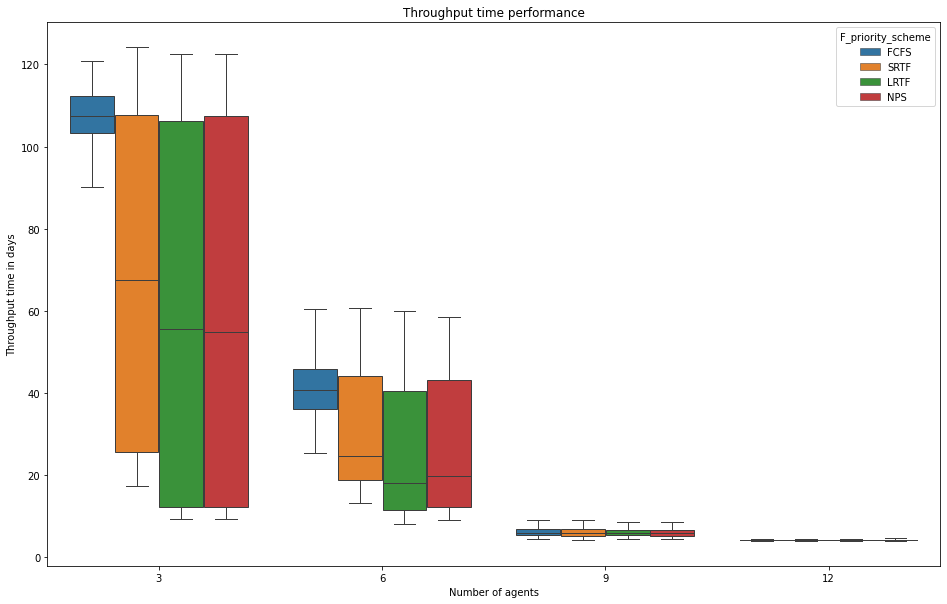

In [21]:
fig = plt.figure(figsize=(16, 10))

sns.boxplot(x=experiments.F_number_of_agents,
            y=experiments[response],
            hue=experiments.F_priority_scheme,
            #hue_order = hue_order,
            width=0.8,
            dodge=True,
            showfliers = False,
            linewidth=1,
            whis=1.5)

plt.xlabel("Number of agents")
plt.ylabel("Throughput time in days")

plt.title("Throughput time performance")


plt.savefig("TT_performance.png", dpi=200, bbox_inches = "tight")

plt.show()

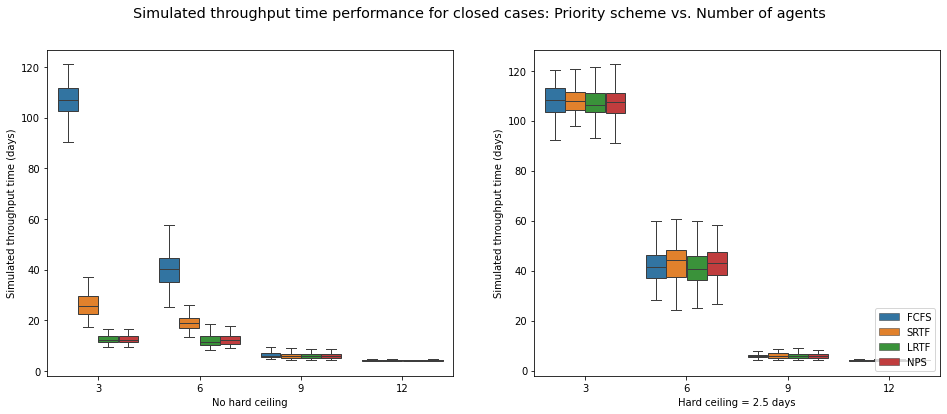

In [22]:
response = "closed_avg_simulated_throughput_time"

fig, ax = plt.subplots(
    nrows=1,
    ncols=2, figsize=(16, 6))

st = fig.suptitle("Simulated throughput time performance for closed cases: Priority scheme vs. Number of agents", fontsize="x-large")

""" divide to two plots"""

width = 0.8
linewidth = 1

hue_order = ["FCFS","SRTF","LRTF","NPS"]

NONE = experiments.loc[experiments.F_hard_ceiling == "NONE"]

sns.boxplot(x=NONE.F_number_of_agents,
            y=NONE[response],
            hue=NONE.F_priority_scheme,
            hue_order = hue_order,
            width=width,
            dodge=True,
            showfliers = False,
            linewidth=linewidth,
            whis=1.5,
            ax=ax[0])


SLA = experiments.loc[experiments.F_hard_ceiling == "SLA"]

sns.boxplot(x=SLA.F_number_of_agents,
            y=SLA[response],
            hue=SLA.F_priority_scheme,
            hue_order = hue_order,
            width=width,
            dodge=True,
            showfliers = False,
            linewidth=linewidth,
            whis=1.5,
            ax=ax[1])

#fig.title("Simulated tNPS performance (after case completion)")

ax[0].set(ylabel='Simulated throughput time (days)', xlabel='No hard ceiling')#, ylim=[-93,-83])
ax[0].legend([],[], frameon=False)

ax[1].set(ylabel='Simulated throughput time (days)', xlabel='Hard ceiling = 2.5 days')#, ylim=[-93,-83])
ax[1].legend(loc='lower right')

plt.savefig("TT_performance.png", dpi=200, bbox_inches = "tight")

# GLM: Gammra regression

In [23]:
import statsmodels.api as sm
#https://www.statsmodels.org/stable/glm.html

In [24]:
#sm.GLM()

In [25]:
experiments.columns

Index(['F_priority_scheme', 'F_number_of_agents', 'F_SLA', 'burn_in', 'days',
       'startdate', 'service_level', 'repetition', 'closed_avg_simulated_NPS',
       'closed_avg_simulated_throughput_time', 'closed_avg_predicted_NPS',
       'closed_avg_predicted_throughput_time',
       'closed_avg_predicted_NPS_priority', 'closed_avg_initial_delay',
       'closed_avg_activity_start_delay', 'closed_avg_duration_delayed',
       'all_avg_simulated_NPS', 'all_avg_simulated_throughput_time',
       'all_avg_predicted_NPS', 'all_avg_predicted_throughput_time',
       'all_avg_predicted_NPS_priority', 'all_avg_initial_delay',
       'all_avg_activity_start_delay', 'all_avg_duration_delayed',
       'cases_arrived', 'cases_closed', 'case_queued', 'cases_assigned_at_end',
       'min_tracelen', 'max_tracelen', 'Simulation_duration_min', 'RUN',
       'Done'],
      dtype='object')

In [26]:
experiments["F_priority_scheme"] = experiments.F_priority_scheme.astype('category')
experiments["F_number_of_agents"] = experiments.F_number_of_agents.astype('category')

In [27]:
formula = "closed_avg_simulated_throughput_time ~ F_number_of_agents + F_priority_scheme + F_number_of_agents*F_priority_scheme"

In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

"""
[statsmodels.genmod.families.links.Log,
 statsmodels.genmod.families.links.identity,
 statsmodels.genmod.families.links.inverse_power]
"""
link_fx = statsmodels.genmod.families.links.inverse_power()

#Instantiate a gamma family model with the default link function.
gamma_model = smf.glm(formula=formula, data=experiments, family=sm.families.Gamma(link_fx))

C:\Users\Mike\anaconda3\envs\PPM-RT-MODEL\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


In [29]:
gamma_results = gamma_model.fit()

In [30]:
print(gamma_results.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     closed_avg_simulated_throughput_time   No. Observations:                 2000
Model:                                              GLM   Df Residuals:                     1980
Model Family:                                     Gamma   Df Model:                           19
Link Function:                            inverse_power   Scale:                        0.023443
Method:                                            IRLS   Log-Likelihood:                -4275.6
Date:                                  Sat, 28 Jan 2023   Deviance:                       45.699
Time:                                          21:01:37   Pearson chi2:                     46.4
No. Iterations:                                       9   Pseudo R-squ. (CS):              1.000
Covariance Type:                              nonrobust                                         
                              

# Performance analysis

In [33]:
experiments.loc[10]

F_priority_scheme                                LRTF
F_number_of_agents                                  9
F_hard_ceiling                                   NONE
ceiling_value                                     2.5
burn_in                                             0
days                                              365
startdate                                  2018-07-01
repetition                                          0
closed_avg_simulated_NPS                           -1
closed_avg_simulated_throughput_time          4.61643
closed_avg_predicted_NPS                           -1
closed_avg_predicted_throughput_time               -1
closed_avg_predicted_NPS_priority                  -1
closed_avg_initial_delay                           -1
closed_avg_activity_start_delay                    -1
closed_avg_duration_delayed                        -1
all_avg_simulated_NPS                              -1
all_avg_simulated_throughput_time                  -1
all_avg_predicted_NPS       

In [28]:
experiments["case_completion_rate"] = experiments["cases_closed"] / experiments["cases_arrived"]

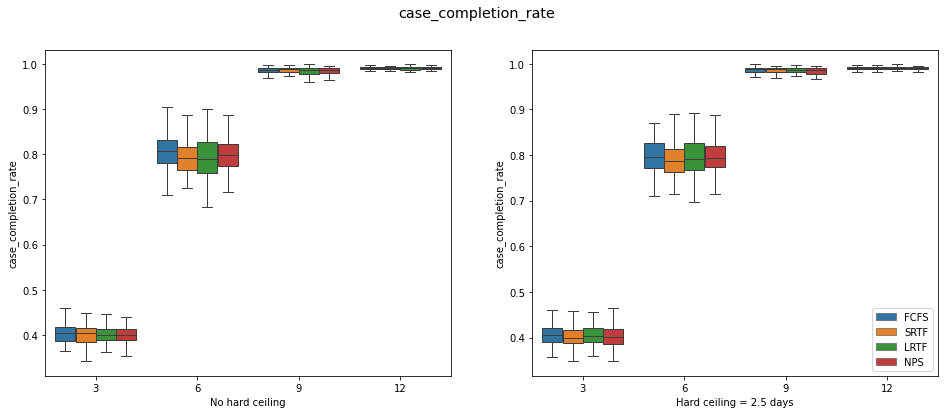

In [32]:
response = "case_completion_rate"

fig, ax = plt.subplots(
    nrows=1,
    ncols=2, figsize=(16, 6))

st = fig.suptitle(response, fontsize="x-large")

""" divide to two plots"""

width = 0.8
linewidth = 1

hue_order = ["FCFS","SRTF","LRTF","NPS"]

NONE = experiments.loc[experiments.F_hard_ceiling == "NONE"]

sns.boxplot(x=NONE.F_number_of_agents,
            y=NONE[response],
            hue=NONE.F_priority_scheme,
            hue_order = hue_order,
            width=width,
            dodge=True,
            showfliers = False,
            linewidth=linewidth,
            whis=1.5,
            ax=ax[0])


SLA = experiments.loc[experiments.F_hard_ceiling == "SLA"]

sns.boxplot(x=SLA.F_number_of_agents,
            y=SLA[response],
            hue=SLA.F_priority_scheme,
            hue_order = hue_order,
            width=width,
            dodge=True,
            showfliers = False,
            linewidth=linewidth,
            whis=1.5,
            ax=ax[1])

#fig.title("Simulated tNPS performance (after case completion)")

ax[0].set(ylabel=response, xlabel='No hard ceiling')#, ylim=[0, 120])
ax[0].legend([],[], frameon=False)

ax[1].set(ylabel=response, xlabel='Hard ceiling = 2.5 days')#, ylim=[0, 120])
ax[1].legend(loc='lower right')

#plt.savefig("WT_performance.png", dpi=200, bbox_inches = "tight")

# Average number of cases waiting in queue

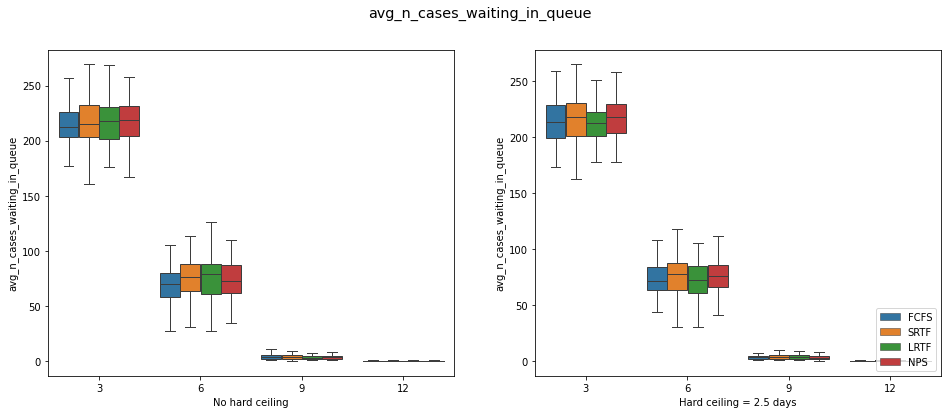

In [34]:
response = "avg_n_cases_waiting_in_queue"

fig, ax = plt.subplots(
    nrows=1,
    ncols=2, figsize=(16, 6))

st = fig.suptitle(response, fontsize="x-large")

""" divide to two plots"""

width = 0.8
linewidth = 1

hue_order = ["FCFS","SRTF","LRTF","NPS"]

NONE = experiments.loc[experiments.F_hard_ceiling == "NONE"]

sns.boxplot(x=NONE.F_number_of_agents,
            y=NONE[response],
            hue=NONE.F_priority_scheme,
            hue_order = hue_order,
            width=width,
            dodge=True,
            showfliers = False,
            linewidth=linewidth,
            whis=1.5,
            ax=ax[0])


SLA = experiments.loc[experiments.F_hard_ceiling == "SLA"]

sns.boxplot(x=SLA.F_number_of_agents,
            y=SLA[response],
            hue=SLA.F_priority_scheme,
            hue_order = hue_order,
            width=width,
            dodge=True,
            showfliers = False,
            linewidth=linewidth,
            whis=1.5,
            ax=ax[1])

#fig.title("Simulated tNPS performance (after case completion)")

ax[0].set(ylabel=response, xlabel='No hard ceiling')#, ylim=[0, 120])
ax[0].legend([],[], frameon=False)

ax[1].set(ylabel=response, xlabel='Hard ceiling = 2.5 days')#, ylim=[0, 120])
ax[1].legend(loc='lower right')

#plt.savefig("WT_performance.png", dpi=200, bbox_inches = "tight")

# Waiting time in queue

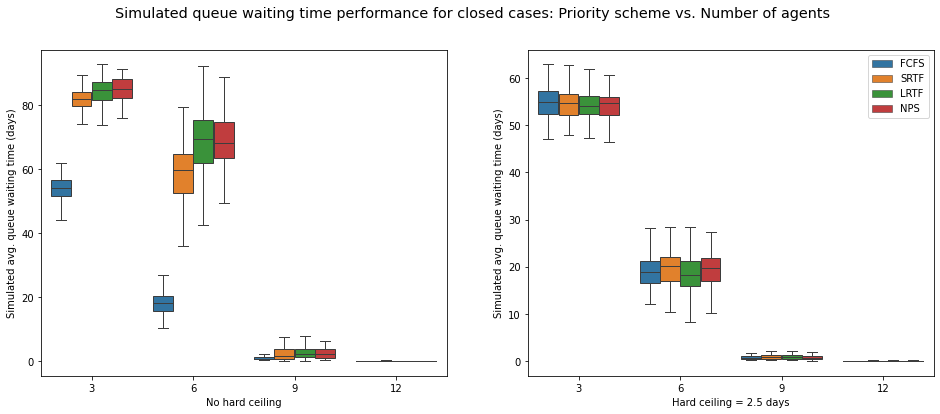

In [35]:
response = "avg_daily_queue_waitingtime"

fig, ax = plt.subplots(
    nrows=1,
    ncols=2, figsize=(16, 6))

st = fig.suptitle("Simulated queue waiting time performance for closed cases: Priority scheme vs. Number of agents", fontsize="x-large")

""" divide to two plots"""

width = 0.8
linewidth = 1

hue_order = ["FCFS","SRTF","LRTF","NPS"]

NONE = experiments.loc[experiments.F_hard_ceiling == "NONE"]

sns.boxplot(x=NONE.F_number_of_agents,
            y=NONE[response],
            hue=NONE.F_priority_scheme,
            hue_order = hue_order,
            width=width,
            dodge=True,
            showfliers = False,
            linewidth=linewidth,
            whis=1.5,
            ax=ax[0])


SLA = experiments.loc[experiments.F_hard_ceiling == "SLA"]

sns.boxplot(x=SLA.F_number_of_agents,
            y=SLA[response],
            hue=SLA.F_priority_scheme,
            hue_order = hue_order,
            width=width,
            dodge=True,
            showfliers = False,
            linewidth=linewidth,
            whis=1.5,
            ax=ax[1])

#fig.title("Simulated tNPS performance (after case completion)")

ax[0].set(ylabel='Simulated avg. queue waiting time (days)', xlabel='No hard ceiling')#, ylim=[0, 120])
ax[0].legend([],[], frameon=False)

ax[1].set(ylabel='Simulated avg. queue waiting time (days)', xlabel='Hard ceiling = 2.5 days')#, ylim=[0, 120])
ax[1].legend(loc='upper right')

plt.savefig("WT_performance.png", dpi=200, bbox_inches = "tight")